# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
k-Means Clustering

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of k-Means Clustering
* Examine code samples that walk us through **The Process™**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: k-Means Clustering
---

Clustering models are popular machine learning models because they:

* are unsupervised and thus don't require pre-determined labels
* can accommodate multidimensional datasets
* can, for simple cases, be fairly easy to interpret

k-Means Clustering algorithms: 

* look for the arithmetic mean of all points in a cluster to identify the cluster centers
* group points together by identifying the closest cluster center

For this example, we will use the KMeans model. The sklearn.cluster module has a number of clustering models, including:

* AffinityPropagation
* DBSCAN
* KMeans
* MeanShift
* SpectralClustering
* and more...

With this background, let's apply **The Process™** on the KMeans Clustering model.

## Prep the data

We start with a set of standard imports...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.cluster import KMeans

### Prep the training Data

As mentioned, a number of data generating functions exist in Scikit Learn to help you create data sets that you can use to play with and manipulate the models. For this example, I want to explore one of these data generation libraries: 

```python
sklearn.datasets.samples_generator.make_blobs
```

These dataset generators produce preformatted `features` matrices and `target` arrays.

This dataset is composed of a `features matrix` of `x` and `y` vectors that can be plotted on a chart and a `target array` of cluster identifiers.

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X_train, y_true = make_blobs(n_samples=400,
                             centers=4,
                             cluster_std=0.70,
                             random_state=13)

It can be really useful to take a look at the features matrix and target array of the training data. 

* In the raw form
* In a visualization tool

For this dataset, let's use a scatter plot.

In [4]:
X_train.shape

(400, 2)

In [5]:
X_train[:5]

array([[ 6.25899533,  9.23696263],
       [ 2.34655063,  5.34350419],
       [ 8.71515482, -1.32204244],
       [ 7.22234292,  8.24111636],
       [ 2.32679551,  4.77435113]])

In [8]:
y_true[:100]

array([1, 3, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0,
       1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 0,
       3, 2, 1, 3, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 3, 1, 3, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 3, 2, 1, 1, 2, 0, 3, 0, 1, 1,
       0, 1, 1, 2, 3, 0, 0, 3, 0, 0, 2, 3])

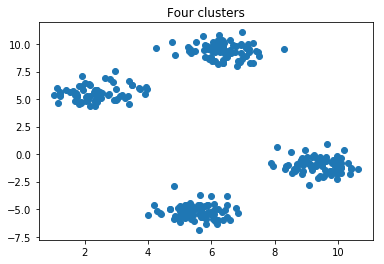

In [9]:
plt.scatter(X_train[:300, 0], X_train[:300, 1])
plt.title("Four clusters");

### Prep the test data

In this case, the X_train data will also be our testing data. We know what cluster categories were assigned by the make_blob function, but we want to see if the KMeans model will correctly identify them.

## Choose the Model

In [10]:
from sklearn.cluster import KMeans

## Choose Appropriate Hyperparameters

Here we choose to assign xx hyperparameters: `xx` and `xx`. We will discuss both later.

In [11]:
model = KMeans(n_clusters=4)

There are a number of hyperparameters... we will cover several in greater depth later.

```python
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
)
```

## Fit the Model

This model doesn't need OR use any labels, so we simply feed in the `X_train` data.

In [12]:
model.fit(X_train[:300])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Apply the Model

In [13]:
y_pred = model.predict(X_train[300:])

In [14]:
y_pred.shape

(100,)

In [15]:
y_pred[:5]

# array([1, 3, 2, 1, 3]) for comparison's sake, from y_true.
# while the numbers won't be the same...
#     the categorization should be pretty close

array([3, 2, 3, 2, 1], dtype=int32)

## Examine the results

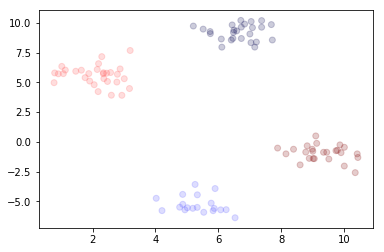

In [16]:
plt.scatter(X_train[300:, 0], X_train[300:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.2)

In [17]:
ctrs = model.cluster_centers_

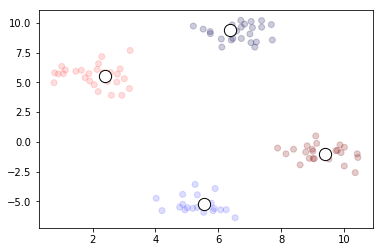

In [18]:
plt.scatter(X_train[300:, 0], X_train[300:, 1],
            c=y_pred,
            cmap='seismic', alpha=0.2)

plt.scatter(ctrs[:, 0], ctrs[:, 1],
            c='white',
            edgecolors='black',
            s=150,
            )

# Gotchas
---

The k-Means Clustering model works based on a process called Expectation-Maximization. In this process, the model:

* starts by randomly picking some cluster centers
* repeats the following cycle until the model converges
    * Expectation: assign points to the closest cluster center
    * Maximization: set new cluster centers to the mean of the points in the cluster

The process is designed such that for every cycle of the Expectation and Maximization steps, the model will always have a better estimation of any given cluster.

**No global guarantees**: despite the promise of convergence... there is no guarantee that as a whole the clusters produced will globally be the most suitable clusters.

It really depends on the randomly selected initial cluster centers. To overcome this limitation, the model typically runs the algorithm multiple times. The default `n_init` is set at `10`.

**You must decide on the number of clusters**: when we set the hyperparameters, we need to initialize the model with the right number of clusters. The default `n_clusters` is set at `8`.

* There are other models that may provide some measure of the fitness of the number of clusters: `GaussianMixtrue`
* There are other models that can choose a suitable number of clusters: `DBSCAN`, `MeanShift`

**Speed considerations**: can be slow on large datasets.

# Deep Dive
---

# How to learn more: tips and hints
---

Some ideas on things to study:

**Train/Test sets**:
Breaking up your data into test sets and training sets:

[sklearn.model.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**Scoring and validating your models**:

[https://scikit-learn.org/stable/modules/learning_curve.html]()

[https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation]()


# Experience Points!
---

# N/A: task 01

There is no exercise!

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[General API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[KMeans API Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)||
|[User Guide](https://scikit-learn.org/stable/modules/clustering.html#k-means)||
|[Sample datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)|Load or create datasets for practice and study|
|[Make blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)|Specifically make clusters of values|